## TRIGGERS

Triggers are a feature in MySQL that allow you to __execute a set of actions automatically in response to specific events,__ such as the insertion, update, or deletion of data in a table. 

Triggers can be used to enforce business rules, maintain data integrity, and perform actions that are related to the change in data, such as logging changes or updating other tables.


- A trigger is defined using the CREATE TRIGGER statement 


- and consists of two parts: 
    - the trigger definition 
    - and the trigger body. 


- The trigger definition specifies the event that activates the trigger, such as an insert into a specific table, 


- and the trigger body contains the SQL statements that are executed when the trigger is activated.

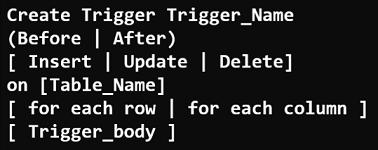

```sql
CREATE TRIGGER update_last_update
AFTER UPDATE ON mytable
FOR EACH ROW
BEGIN
  SET NEW.last_update = NOW();
END;
```

In this example, the trigger is named update_last_update, is activated AFTER an update to the mytable table, and FOR EACH ROW updates the value of the last_update column to the current time.

### INSERT in TRIGGERS:

##### 1. BEFORE INSERT TRIGGERS:

These are used to update or validate record values before they're saved to the database.

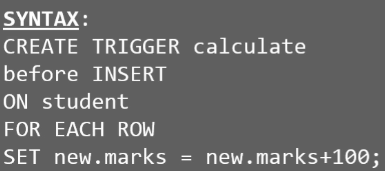

##### 2. AFTER INSERT TRIGGERS:

After Insert Triggers are used to access field values that are set by the system and to effect changes in other records

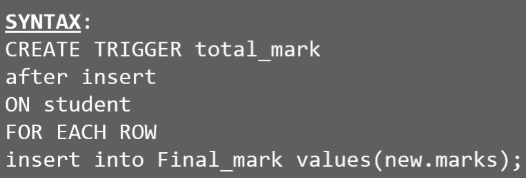

__Triggers are a powerful tool for automating tasks and enforcing data constraints, but they can also be complex and difficult to debug, so it's important to use them carefully and test them thoroughly.__

#### Show a trigger:

```sql
show trigger update_last_update in mohit_db;
```

#### Dropping a trigger:

```sql
drop trigger update_last_update;
```

### Difference between Stored Procedure and Triggers:

1. Stored procedures are named units of executable code that encapsulate business logic and can be called directly.


- Triggers are special types of stored procedures that are automatically executed in response to predefined database events on a specific table.


2. Stored procedure needs to be explicitly called by programmers but Triggers are automatically called when an event occurs.


3. Stored procedures can accept parameters and return values but triggers cannot accept parameters and cannot return a value.


4. Stored procedure can use Transaction statements but triggers cannot.

### Types of triggers :

There are mainly two types of triggers: **row-level triggers** and **statement-level triggers**.

1. **Row-Level Triggers:**
   - **Before Row-Level Triggers:** These triggers are fired before a specific row is modified due to an INSERT, UPDATE, or DELETE operation. They can be used to modify values before they are actually written to the database.
   - **After Row-Level Triggers:** These triggers are fired after a specific row is modified. They are often used for tasks like logging changes or updating related data after an operation.



2. **Statement-Level Triggers:**
   - **Before Statement-Level Triggers:** These triggers are fired before a SQL statement (such as an INSERT, UPDATE, or DELETE) is executed. They can be used to validate or modify data across multiple rows before the statement is executed.
   - **After Statement-Level Triggers:** These triggers are fired after a SQL statement is executed. They are often used for tasks like generating reports or performing calculations on the affected data.

In addition to these categories, triggers can also be classified based on the timing of their execution:
- **Before Triggers:** Fired before the triggering event.
- **After Triggers:** Fired after the triggering event.

It's important to note that triggers can be defined to respond to specific events on specific tables. For example, you can create an "AFTER INSERT" trigger that runs after an insert operation is performed on a particular table.

### Advantages of triggers:


1. Triggers are useful for maintaining data integrity,
2. automating repetitive tasks, 
3. logging changes, 
4. enforcing business rules, and more. 


However, they should be used judiciously, as they can introduce complexity to a database schema and impact performance if not properly managed.

### Five common use cases for triggers along with SQL queries:

1. **Audit Trail Logging:**
   Use Case: Record every change made to a specific table for auditing purposes.
   SQL Query:
   ```sql
   CREATE TRIGGER log_changes
   AFTER INSERT OR UPDATE OR DELETE
   ON your_table
   FOR EACH ROW
   BEGIN
       INSERT INTO audit_log (table_name, action, timestamp)
       VALUES ('your_table', 'INSERT/UPDATE/DELETE', NOW());
   END;
   ```

2. **Enforcing Business Rules:**
   Use Case: Enforce complex business rules or constraints that cannot be handled by standard constraints.
   SQL Query:
   ```sql
   CREATE TRIGGER enforce_rules
   BEFORE INSERT
   ON orders
   FOR EACH ROW
   BEGIN
       IF NEW.total_amount > 10000 THEN
           SIGNAL SQLSTATE '45000'
           SET MESSAGE_TEXT = 'Total amount exceeds limit';
       END IF;
   END;
   ```

3. **Cascading Updates/Deletes:**
   Use Case: Automatically update or delete related records in other tables when changes occur in a primary table.
   SQL Query:
   ```sql
   CREATE TRIGGER cascade_update
   AFTER UPDATE
   ON products
   FOR EACH ROW
   BEGIN
       UPDATE inventory SET price = NEW.price WHERE product_id = NEW.id;
   END;
   ```

4. **Data Validation:**
   Use Case: Validate data before it is inserted or updated to ensure it meets specific criteria.
   SQL Query:
   ```sql
   CREATE TRIGGER validate_data
   BEFORE INSERT OR UPDATE
   ON employees
   FOR EACH ROW
   BEGIN
       IF NEW.salary < 30000 THEN
           SIGNAL SQLSTATE '45000'
           SET MESSAGE_TEXT = 'Salary too low';
       END IF;
   END;
   ```

5. **Automated Timestamps:**
   Use Case: Automatically update timestamp columns (e.g., created_at, updated_at) when a record is inserted or updated.
   SQL Query:
   ```sql
   CREATE TRIGGER update_timestamp
   BEFORE INSERT OR UPDATE
   ON your_table
   FOR EACH ROW
   BEGIN
       IF INSERTING THEN
           NEW.created_at = NOW();
       END IF;
       NEW.updated_at = NOW();
   END;
   ```

These use cases demonstrate how triggers can automate actions, enforce rules, and maintain data integrity in a database. Triggers are versatile and can be applied to various scenarios to enhance database functionality and control.

---
---

## CURSORS

- In SQL, a cursor is a database object that allows you to retrieve and manipulate rows of a result set one at a time. It provides a way to traverse through the rows of a query result, perform operations on them, and access the data in a controlled manner.


- Cursors are often used when you need to process rows sequentially, perform calculations, apply conditions, or update data in a procedural manner. Cursors are commonly used within stored procedures, functions, and triggers.

### Types of cursors:

There are two main types of cursors in SQL:

### 1. **Implicit Cursors:**


Implicit cursors are automatically managed by the database system when executing a SQL statement. They are used for single-row queries that return a single result. You don't need to explicitly declare or manage these cursors.


   For example, when you run a simple `SELECT` statement like:
   ```sql
   SELECT column_name FROM table_name WHERE condition;
   ```
   The database system handles the cursor internally to retrieve the result row(s).

### 2. **Explicit Cursors:**


Explicit cursors are declared and managed by the user. They provide more control over the retrieval and manipulation of data. Explicit cursors are used for more complex scenarios where you want to iterate through multiple rows, perform calculations, and handle conditions.

#### To use an explicit cursor, you need to:

   
   - Declare the cursor with a unique name.
   
   
   - Associate the cursor with a specific query using the `SELECT` statement.
   
   
   - Open the cursor.
   
   
   - Fetch rows one by one using `FETCH` statements.
   
   
   - Process the fetched data.
   
   
   - Close the cursor when done.

Here's a simplified example of using an explicit cursor:

```sql
DECLARE cursor_name CURSOR FOR
SELECT column_name FROM table_name WHERE condition;

OPEN cursor_name;

FETCH NEXT FROM cursor_name INTO @variable;

WHILE @@FETCH_STATUS = 0
BEGIN
   -- Process @variable
   FETCH NEXT FROM cursor_name INTO @variable;
END

CLOSE cursor_name;
DEALLOCATE cursor_name;
```

It's worth noting that while cursors provide a way to process data sequentially, they can be less efficient than using set-based operations, especially when dealing with large datasets. 


___In many cases, it's recommended to explore alternative approaches such as using joins, subqueries, and other SQL features to achieve your desired results without the need for cursors.___

### Attributes of Cursor:

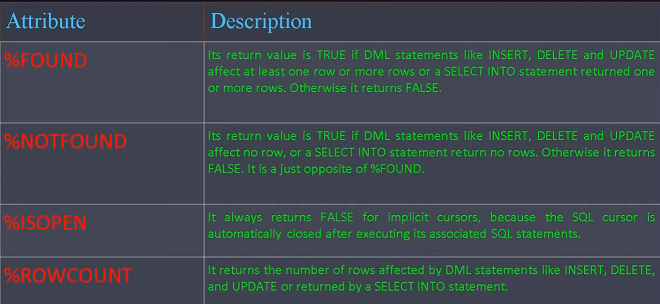

## Exception Handling

Exception handling in SQL refers to the mechanism by which you can gracefully handle and manage errors that may occur during the execution of SQL statements or procedures. 

- TRY: You put your main instructions in a "TRY" block. It's like the normal set of steps you want to happen.


- CATCH: You also create a "CATCH" block, like a backup plan. If something unexpected happens in the "TRY" block, the code jumps to the "CATCH" block.


- HANDLE: Inside the "CATCH" block, you write what to do if something goes wrong. Maybe you'll show an error message, log the issue, or even fix it.

##### eg : 

```sql
BEGIN TRY
    -- Your main instructions
    SELECT 10 / 2;  -- This works fine
    SELECT 5 / 0;   -- Oops, division by zero!
END TRY
BEGIN CATCH
    -- Your backup plan
    PRINT 'Something went wrong!';  -- Show an error message
    -- You can also log the error or take other actions here
END CATCH;

--- the first division works fine, but the second one causes a problem (division by zero). Instead of crashing, the code jumps to the "CATCH" block, shows an error message, and you can handle the issue without the whole process falling apart.
```

Here's an overview of how exception handling works in SQL:

1. **TRY-CATCH Blocks:**
   Most modern database systems support a TRY-CATCH block structure, which allows you to wrap the risky code inside a TRY block. If an exception occurs, it is caught by the associated CATCH block, where you can handle the error condition.


2. **RAISE or THROW:**
   Inside the CATCH block, you can use the RAISE or THROW statement to explicitly raise or re-throw the exception after handling it. This allows you to bubble up the exception to higher levels of code for further handling if needed.


3. **Error Codes and Messages:**
   When an exception occurs, the database system provides an error code and an error message that describe the nature of the error. These details can be useful for identifying the cause of the problem and handling it appropriately.


4. **Logging and Notification:**
   Exception handling often involves logging the error details for debugging and audit purposes. You might also want to send notifications to system administrators or other stakeholders when critical errors occur.


5. **Rollback and Transactions:**
   In many cases, when an exception occurs within a transaction, you might want to perform a rollback to ensure that the database remains in a consistent state. Transactions help maintain data integrity by allowing you to undo changes made before the exception occurred.


6. **Custom Exception Handling:**
   Some database systems allow you to define custom exception types and handlers, which can provide more granularity in how you handle different types of errors.

Here's a simplified example of exception handling using a TRY-CATCH block in SQL Server:

```sql
BEGIN TRY
    -- Risky SQL code
    SELECT 1 / 0;  -- This will cause a division by zero error
END TRY
BEGIN CATCH
    -- Handle the exception
    PRINT 'An error occurred: ' + ERROR_MESSAGE();
END CATCH;
```

Remember that exception handling is an essential part of writing robust and reliable database code. It helps ensure that your application can gracefully handle unexpected scenarios, maintain data integrity, and provide a better user experience.

### Types of Exception Handling:

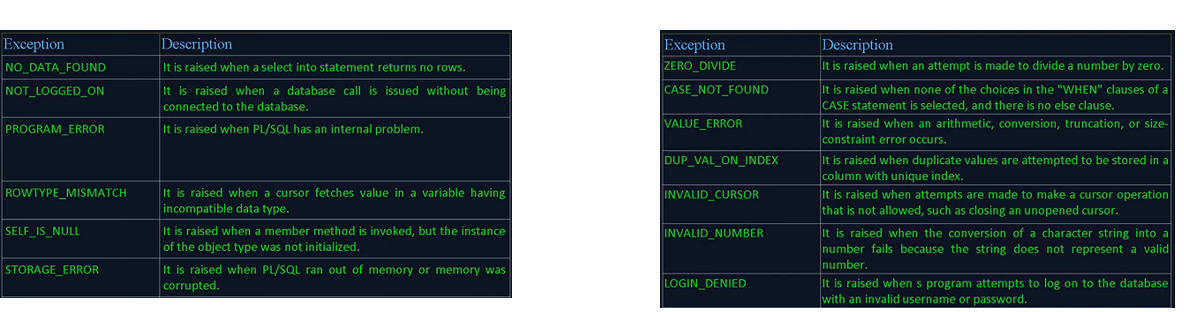

#### eg: table has no id present as id= 8:

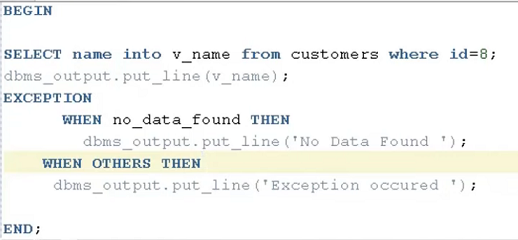

---

---
---

# Transactions

### What are Transactions?

A database transaction is a sequence of operations that are performed as a single logical unit
of work in a database management system (DBMS). A transaction may consist of one or more
database operations, such as inserts, updates, or deletes, which are treated as a single atomic
operation by the DBMS.

It follows the principle of all or none.

### What is Commit, Rollback and Savepoint?

In a database transaction, there are three main commands that are used to manage the
transaction:
1. __Commit :__ A commit command is used to permanently save the changes made by a
transaction to the database. When a transaction is committed, all changes made by the
transaction are made permanent and cannot be rolled back.


2. __Rollback :__ A rollback command is used to undo the changes made by a transaction and
return the database to its state before the transaction began. When a transaction is rolled
back, all changes made by the transaction are discarded and the database is returned to
its previous state.


3. __Savepoint :__ A savepoint command is used to mark a specific point within a transaction
where a rollback can be performed. This allows for partial rollbacks of a transaction,
where only changes made after the savepoint are undone, while changes made before
the savepoint are still committed to the database.

## What is Autocommit?

Autocommit is a feature of database management systems (DBMS) that automatically
commits each individual database transaction as soon as it is completed, rather than requiring
an explicit commit command to be issued.

___INSERT is a autocommit command___

When Autocommit is enabled, each individual SQL statement issued against the database is
treated as a separate transaction and is committed immediately after it is executed. This
means that each SQL statement becomes a separate, independent transaction, and its effects
are immediately visible to other users.

#### If autocommit = 0 then the changes will not be permenent:

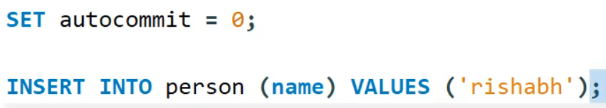

#### Making it permanent:

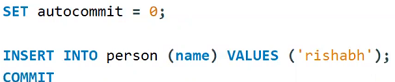

#### initial table :

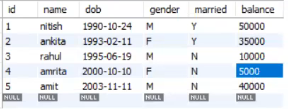

### 1. START TRANSACTION -> show operations without committing

##### no rollback, no commit: so no permanent changes

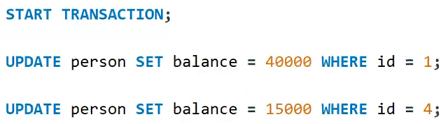

##### Now using commit() for permanent changes:

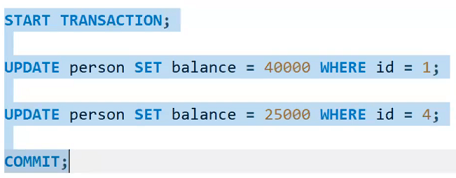

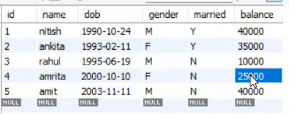

### 2. START TRANSACTION -> all or none with commit

##### initial table : 

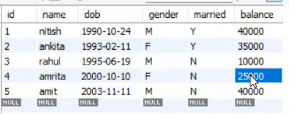

##### knowingly making mistake in second update command. first will get executed but second won't

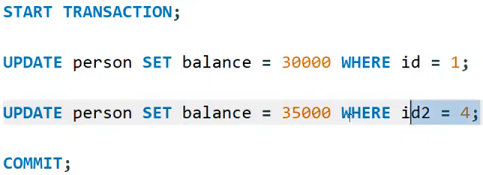

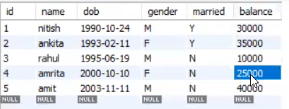

##### after reconnection :

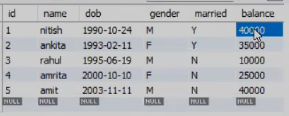

##### still no changes were made even after using commit()

### 3. rollback

#### rollback happens in opposite direction. first 2nd command will be executed, then 1st will be executed.

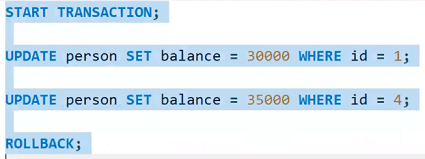

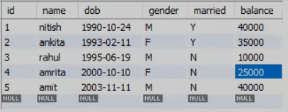

##### due to rollback no changes were made. table is still in the form at start transaction.

### 4. rollback with savepoint

##### rollbacking to point B. So A will be executed but B won't

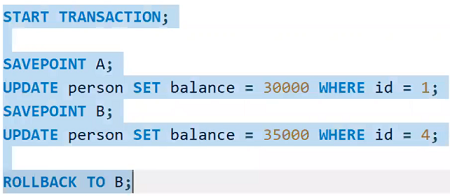

##### output:

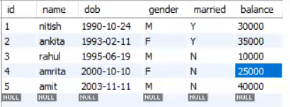

### 5. rollback and commit together

## What is ACID properties of a Transaction?

ACID is an acronym that stands for Atomicity, Consistency, Isolation, and Durability, which are
a set of properties that ensure reliable database transactions:


1. __Atomicity :__ This property ensures that a transaction is treated as a single, indivisible unit
of work. This means that either all of the changes made by a transaction are committed to
the database, or none of them are. If any part of the transaction fails, the entire
transaction is rolled back, and all changes are undone.


2. __Consistency :__ This property ensures that a transaction takes the database from one valid
state to another valid state. It requires that all data in the database must conform to a set
of rules, or constraints, which ensure data integrity.


3. __Isolation :__ This property ensures that concurrent transactions do not interfere with each
other. It requires that each transaction executes as if it were the only transaction
executing against the database, even if multiple transactions are executing at the same
time.


4. __Durability :__ This property ensures that once a transaction is committed, its changes are
permanently stored in the database, even in the event of a system failure or power
outage. This is typically achieved through the use of database backups, replication, or
other forms of data redundancy.

Together, these properties ensure that database transactions are reliable, consistent, and
accurate, and that the data stored in a database is both protected and available at all times.
The ACID properties are essential for mission-critical applications that require high levels of
data integrity and availability, such as banking, finance, and healthcare systems.

---
---

## WITH CHECK()

 `WITH CHECK OPTION` is a clause that can be used when creating or modifying a view. It is used to ensure that any data modifications (inserts, updates, or deletes) performed through the view adhere to the conditions specified in the view's definition. If a row doesn't satisfy the conditions of the view, the modification is disallowed.

#### eg:

Let's say you have a database with two tables: `employees` and `departments`. 


You want to create a view that shows employees from the 'Marketing' department. 

You can create this view and use the `WITH CHECK OPTION` to ensure that only employees from the 'Marketing' department can be inserted or modified through the view:

```sql
CREATE VIEW marketing_employees AS
SELECT employee_id, employee_name, department_id
FROM employees
WHERE department_id = 1 -- Assuming 'Marketing' department has ID 1

WITH CHECK OPTION; -- Enable the CHECK OPTION
```

Now, if you try to insert an employee from a department other than 'Marketing' through the `marketing_employees` view, the operation will be rejected:

```sql
-- This will not work because the CHECK OPTION ensures only 'Marketing' department employees are inserted

INSERT INTO marketing_employees (employee_id, employee_name, department_id)
VALUES (101, 'John Doe', 2); -- Department 2 is not 'Marketing'
```

Similarly, if you try to update an employee's department to something other than 'Marketing', it will also be disallowed:

```sql
-- This will not work because the CHECK OPTION ensures only 'Marketing' department employees can be modified

UPDATE marketing_employees
SET department_id = 3 -- Assuming department 3 is not 'Marketing'
WHERE employee_id = 101;
```

The `WITH CHECK OPTION` clause is particularly useful when you want to restrict data modifications through a view to a specific subset of data based on certain conditions. It ensures that any data modifications made through the view remain consistent with the view's filtering criteria.


Keep in mind that the behavior of `WITH CHECK OPTION` may vary between different database systems. Always refer to your specific database system's documentation for precise details and behavior.

---
---

# Recursive SQL Queries

A recursive SQL query, also known as a recursive common table expression (CTE), is a powerful feature in SQL that allows you to perform recursive operations on hierarchical data stored in a relational database. This is particularly useful for dealing with data structures like trees and graphs. Recursive SQL queries are often used to traverse parent-child relationships or to perform tasks such as finding the path between two nodes in a tree structure.

Recursive CTEs work by defining a base case and a recursive case. The base case provides the starting point for the recursion, and the recursive case builds upon the results of previous iterations.

Here's a basic explanation using a hypothetical example. Let's say we have a table named "Employees" with the following columns: employee_id, employee_name, and manager_id. The "manager_id" column indicates the manager for each employee, forming a hierarchical structure.

Example table "Employees":
```
| employee_id | employee_name | manager_id |
|-------------|---------------|------------|
| 1           | Alice         | NULL       |
| 2           | Bob           | 1          |
| 3           | Carol         | 1          |
| 4           | Dave          | 2          |
| 5           | Eve           | 3          |
```

Now, let's say we want to find the hierarchy for a specific employee. We can use a recursive CTE to achieve this:

```sql
WITH RECURSIVE EmployeeHierarchy AS (
    SELECT employee_id, employee_name, manager_id
    FROM Employees
    WHERE employee_name = 'Alice'
    UNION ALL
    SELECT e.employee_id, e.employee_name, e.manager_id
    FROM Employees e
    JOIN EmployeeHierarchy eh ON e.manager_id = eh.employee_id
)
SELECT * FROM EmployeeHierarchy;
```

In this example, the CTE starts with the base case where we select the information for the employee named 'Alice'. Then, in the recursive part, we join the CTE with the Employees table based on the manager_id to find the direct reports of each manager. This process continues until no more rows can be added to the result set.

The final result of the query would be:
```
| employee_id | employee_name | manager_id |
|-------------|---------------|------------|
| 1           | Alice         | NULL       |
| 2           | Bob           | 1          |
| 3           | Carol         | 1          |
| 4           | Dave          | 2          |
| 5           | Eve           | 3          |
```

Recursive SQL queries can be quite powerful for working with hierarchical data, but they require careful consideration to avoid infinite loops or performance issues. It's important to set up proper termination conditions in your recursive query to ensure that the recursion stops at some point.